In [2]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy import feature as cfeature

### Loading metar sets

In [3]:
Met_20170701 = Dataset(  # Metar Training Data
    '/Users/jesseturner/Documents/Wind_Gust_Prediction/Gust_data/20170701_0000')
Met_20180613 = Dataset(  # Metar Training Data
    '/Users/jesseturner/Documents/Wind_Gust_Prediction/Gust_data/20180613_0000')
Met_20190801 = Dataset( # Metar Testing Data
    '/Users/jesseturner/Documents/Wind_Gust_Prediction/Gust_data/2019_08_01/20190801_0300')

### Compile and crop metar data to the continental US

There is likely a more efficient way to do this. The warning of "converting a masked element to nan" is currently expected, but may be changed to do manually in the future. 

In [6]:
met_gust_1 = Met_20170701.variables['windGust']
met_lon_1 = Met_20170701.variables['longitude']
met_lat_1 = Met_20170701.variables['latitude']
met_temp_1 = Met_20170701.variables['temperature']
met_windspeed_1 = Met_20170701.variables['windSpeed']
met_winddir_1 = Met_20170701.variables['windDir']
met_press_1 = Met_20170701.variables['seaLevelPress']

met_gust_2 = Met_20180613.variables['windGust']
met_lon_2 = Met_20180613.variables['longitude']
met_lat_2 = Met_20180613.variables['latitude']
met_temp_2 = Met_20180613.variables['temperature']
met_windspeed_2 = Met_20180613.variables['windSpeed']
met_winddir_2 = Met_20180613.variables['windDir']
met_press_2 = Met_20180613.variables['seaLevelPress']

met_gust_3 = Met_20190801.variables['windGust']
met_lon_3 = Met_20190801.variables['longitude']
met_lat_3 = Met_20190801.variables['latitude']
met_temp_3 = Met_20190801.variables['temperature']
met_windspeed_3 = Met_20190801.variables['windSpeed']
met_winddir_3 = Met_20190801.variables['windDir']
met_press_3 = Met_20190801.variables['seaLevelPress']

top = 49.3457868  # north lat
left = -124.7844079  # west lon
right = -66.9513812  # east lon
bottom = 24.7433195  # south lat

cell_1 = []
for g, lon, lat, t, ws, wd, p in zip(met_gust_1, met_lon_1, met_lat_1, 
                                     met_temp_1, met_windspeed_1, met_winddir_1, met_press_1):
    if left <= lon <= right and bottom <= lat <= top:
        cell_1.append((g, lon, lat, t, ws, wd, p))
met_pos_1 = np.asarray(cell_1)

cell_2 = []
for g, lon, lat, t, ws, wd, p in zip(met_gust_2, met_lon_2, met_lat_2, 
                                     met_temp_2, met_windspeed_2, met_winddir_2, met_press_2):
    if left <= lon <= right and bottom <= lat <= top:
        cell_2.append((g, lon, lat, t, ws, wd, p))
met_pos_2 = np.asarray(cell_2)

cell_3 = []
for g, lon, lat, t, ws, wd, p in zip(met_gust_3, met_lon_3, met_lat_3, 
                                     met_temp_3, met_windspeed_3, met_winddir_3, met_press_3):
    if left <= lon <= right and bottom <= lat <= top:
        cell_3.append((g, lon, lat, t, ws, wd, p))
met_pos_3 = np.asarray(cell_3)

### Convert metar data to dataframe

In [7]:
met_df_1 = pd.DataFrame(
    {'MetWindGust': met_pos_1[:, 0],
     'Longitude': met_pos_1[:, 1],
     'Latitude': met_pos_1[:, 2],
     'Temperature': met_pos_1[:, 3],
     'WindSpeed': met_pos_1[:, 4],
     'WindDirection': met_pos_1[:, 5],
     'Pressure': met_pos_1[:, 6]})

met_df_1 = met_df_1.round(4)
met_df_1 = met_df_1.replace(np.NaN, 0)
met_df_1

met_df_2 = pd.DataFrame(
    {'MetWindGust': met_pos_2[:, 0],
     'Longitude': met_pos_2[:, 1],
     'Latitude': met_pos_2[:, 2],
     'Temperature': met_pos_2[:, 3],
     'WindSpeed': met_pos_2[:, 4],
     'WindDirection': met_pos_2[:, 5],
     'Pressure': met_pos_2[:, 6]})

met_df_2 = met_df_2.round(4)
met_df_2 = met_df_2.replace(np.NaN, 0)
met_df_2

met_df_3 = pd.DataFrame(
    {'MetWindGust': met_pos_3[:, 0],
     'Longitude': met_pos_3[:, 1],
     'Latitude': met_pos_3[:, 2],
     'Temperature': met_pos_3[:, 3],
     'WindSpeed': met_pos_3[:, 4],
     'WindDirection': met_pos_3[:, 5],
     'Pressure': met_pos_3[:, 6]})

met_df_3 = met_df_3.round(4)
met_df_3 = met_df_3.replace(np.NaN, 0)
met_df_3

,MetWindGust,Longitude,Latitude,Temperature,WindSpeed,WindDirection,Pressure
0,0.0,-110.85,31.42,297.05,0.0,0.0,101350.0
1,0.0,-110.96,32.13,300.35,2.6,170.0,101290.0
2,0.0,-111.17,32.14,299.15,2.1,70.0,0.0
3,0.0,-111.21,32.40,300.65,2.1,300.0,0.0
4,0.0,-116.98,32.57,290.95,1.5,0.0,101430.0
...,...,...,...,...,...,...,...
4389,0.0,-72.27,42.57,294.25,0.0,0.0,0.0
4390,0.0,-71.18,44.58,289.85,0.0,0.0,0.0
4391,0.0,-71.70,48.58,289.45,3.1,350.0,101660.0
4392,0.0,-73.34,49.28,284.85,0.0,0.0,101730.0


### Looking at metar data

Highest readings and their locations.

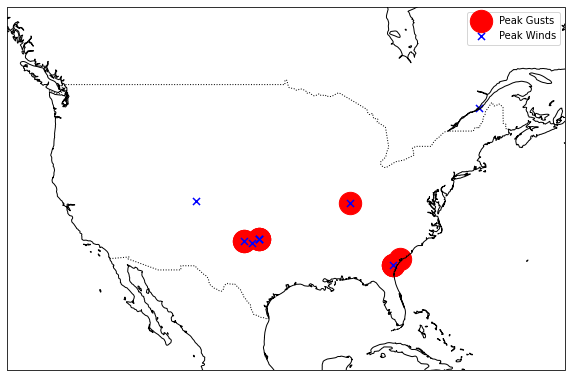

      MetWindGust  Longitude  Latitude  Temperature  WindSpeed  WindDirection  \
1054      21.6067     -98.42     34.57       294.15    14.4044           10.0   
711       21.6067     -98.42     34.57       296.15    14.9189           20.0   
1365      20.5778    -100.28     34.43       299.15    13.3756          170.0   
3436      19.5489     -81.57     31.88       297.15     9.7744          250.0   
3334      19.5489     -81.57     31.88       298.15    10.2889          260.0   
3333      19.5489     -81.57     31.88       298.15    11.3178          250.0   
3901      19.0344     -80.72     32.48       297.15     8.7456          270.0   
2912      18.5200     -86.95     38.25       297.15    13.3756          310.0   
1394      18.5200     -98.42     34.57       293.15    14.4044           40.0   
1393      18.5200    -100.28     34.43       294.15    10.8033          140.0   

      Pressure  
1054       0.0  
711   101010.0  
1365       0.0  
3436  102020.0  
3334  102020.0  
3333  

In [17]:
gust_metar = met_df_1.sort_values(by=['MetWindGust'], ascending=False)
highest_gust = gust_metar[0:10]

wind_metar = met_df_1.sort_values(by=['WindSpeed'], ascending=False)
highest_wind = wind_metar[0:10]

fig = plt.figure(figsize=(10, 10), facecolor='w')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.scatter(highest_gust.Longitude, highest_gust.Latitude, c='Red',
             vmin=0, vmax=50, s=500, label='Peak Gusts', transform=ccrs.PlateCarree())
plt.scatter(highest_wind.Longitude, highest_wind.Latitude, c='Blue',
             vmin=0, vmax=50, s=50, label='Peak Winds', marker='x', transform=ccrs.PlateCarree())

plt.legend()
plt.show()
print(highest_gust)